# Partial Dependence Plots

```
Friedman's partial dependence plots are based on the following idea: consider an arbitrary model obtained by fitting a particular structure (e.g., random forest, support vector machine, or linear regression model) to a given dataset 
```

Partial dependence plots are a great way (though not the only way) to extract insights from complex models. These can be incredibly powerful for communicating those insights to colleagues or non-technical users.

There are a variety of opinions on how to interpret these plots when they come from non-experimental data. Some claim you can conclude nothing about cause-and-effect relationships from data unless it comes from experiments. Others are more positive about what can be learned from non-experimental data (also called observational data). It's a divisive topic in the data science world, beyond the scope of this tutorial.

However most agree that these are useful to understand your model. Also, given the messiness of most real-world data sources, it's also a good sanity check that your model is capturing realistic patterns.

The partial_dependence_plot function is an easy way to get these plots, though the results aren't visually beautiful. The partial_dependence function gives you the raw data, in case you want to make presentation-quality graphs.

## Summary 
Partial dependence plots show how each variable or predictor affects the model's predictions. This is useful for questions like:

* How much of wage differences between men and women are due solely to gender, as opposed to differences in education backgrounds or work experience?
* Controlling for house characteristics, what impact do longitude and latitude have on home prices? To restate this, we want to understand how similarly sized houses would be priced in different areas, even if the homes actually at these sites are different sizes.
* Are health differences between two groups due to differences in their diets, or due to other factors?


## Reference
https://www.kaggle.com/dansbecker/partial-dependence-plots
http://scikit-learn.org/stable/auto_examples/ensemble/plot_partial_dependence.html#
https://cran.r-project.org/web/packages/datarobot/vignettes/PartialDependence.html



## Example 1

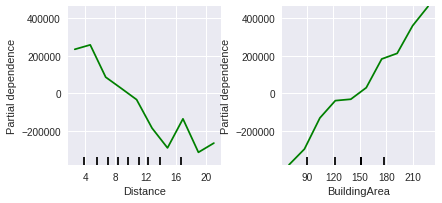

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

%matplotlib inline

# Example 1

cols_to_use = ['Distance', 'Landsize', 'BuildingArea']

def get_some_data():
    data = pd.read_csv('https://github.com/esabunor/MLWorkspace/blob/master/melb_data.csv?raw=true')
    y = data.Price
    X = data[cols_to_use]
    my_imputer = Imputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X, y
    

X, y = get_some_data()
my_model = GradientBoostingRegressor()
my_model.fit(X, y)
my_plots = plot_partial_dependence(my_model, 
                                   features=[0,2], 
                                   X=X, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=10)


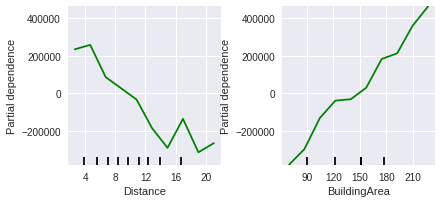

In [4]:
# Example 2								   
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

# get_some_data is defined in hidden cell above.
X, y = get_some_data()
# scikit-learn originally implemented partial dependence plots only for Gradient Boosting models
# this was due to an implementation detail, and a future release will support all model types.
my_model = GradientBoostingRegressor()
# fit the model as usual
my_model.fit(X, y)
# Here we make the plot
my_plots = plot_partial_dependence(my_model,       
                                   features=[0, 2], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=['Distance', 'Landsize', 'BuildingArea'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis								   


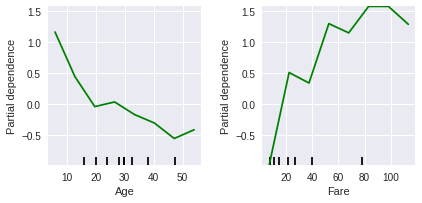

In [5]:
# Example 3

titanic_data = pd.read_csv('https://filebin.net/rht9nh5fo6m26c4y/train.csv')
titanic_y = titanic_data.Survived
clf = GradientBoostingClassifier()
titanic_X_colns = ['PassengerId','Age', 'Fare',]
titanic_X = titanic_data[titanic_X_colns]
my_imputer = Imputer()
imputed_titanic_X = my_imputer.fit_transform(titanic_X)

clf.fit(imputed_titanic_X, titanic_y)
titanic_plots = plot_partial_dependence(clf, features=[1,2], X=imputed_titanic_X, 
                                        feature_names=titanic_X_colns, grid_resolution=8)


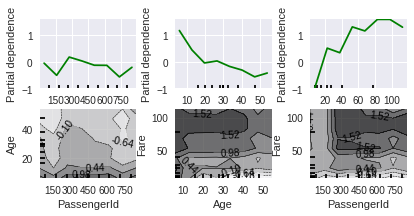

In [12]:
features = [0, 1, 2, (0, 1), (1,2), (0,2)]
fig, axs = plot_partial_dependence(clf, features=features, X=imputed_titanic_X, 
                                        feature_names=titanic_X_colns, grid_resolution=8)
